### 📌 Project Title: Car Price (MSRP) Analysis — EDA & Feature Engineering

This project analyzes a car dataset to understand which factors influence MSRP (car price).
It includes data cleaning, exploratory analysis, feature engineering, encoding, and scaling.

Target variable: MSRP
Goal: Prepare a model-ready dataset.

### Setup & load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\victus\Desktop\project\cars.csv")




### Basic Information About the Dataset

Before cleaning, we check:

Number of rows and columns

Column names

Data types

This helps identify unnecessary columns and data quality issues.

In [2]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.shape

(11914, 16)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Basic Descriptive Statistics

We analyze numeric and categorical features to understand:

Distribution (mean, median, min, max)

Potential outliers

Unique values in categorical features

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [7]:
df.describe(include=object)

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


### Missing values & duplicates





In [8]:
df.isnull().sum().sort_values(ascending=False)

Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Model                   0
Year                    0
Make                    0
Driven_Wheels           0
Transmission Type       0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

####  Handle Missing Values
We inspect missing values to determine the best imputation strategy.
Visualizing missing-value distributions helps confirm whether median/mode imputation is appropriate.

In [9]:
# num_cols=df[["MSRP","Engine Cylinders","Number of Doors","Engine HP"]]
# for col in num_cols:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df[col], bins=40, kde=True)
#     plt.grid(True)
#     plt.show()

<Figure size 1600x800 with 0 Axes>

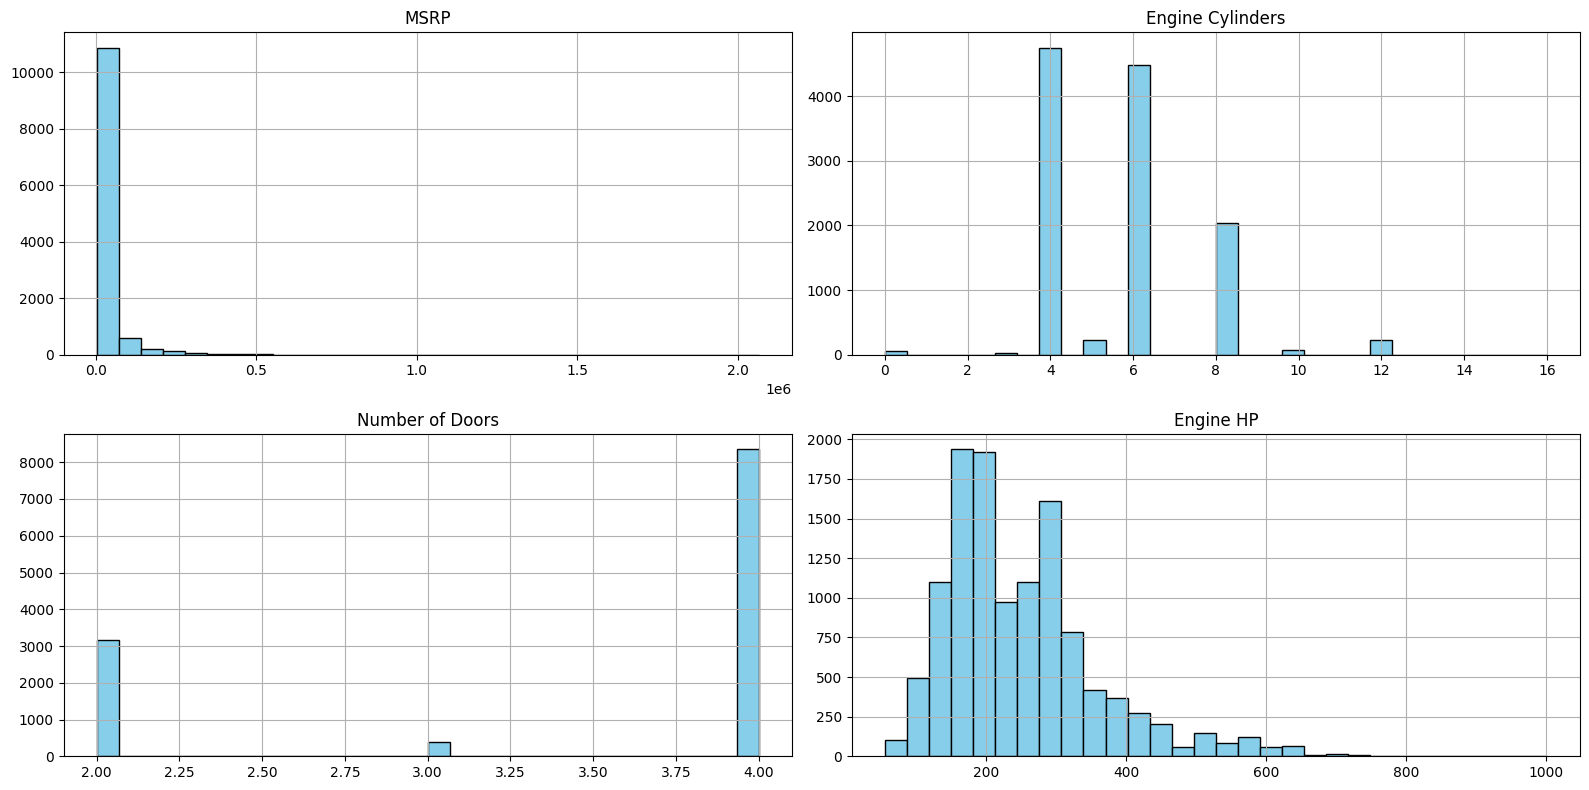

In [10]:


num_null = df[["MSRP","Engine Cylinders","Number of Doors","Engine HP"]]

plt.figure(figsize=(16, 8))
num_null.hist(figsize=(16, 8), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()



In [11]:
df['MSRP'].fillna(df['MSRP'].median(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].median(), inplace=True)
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

df["Engine Fuel Type"].fillna(df["Engine Fuel Type"].mode()[0], inplace=True)



# Used median for numeric → stable even with outliers

# Used mode for categorical




C:\Users\victus\AppData\Local\Temp\ipykernel_13580\3486367013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSRP'].fillna(df['MSRP'].median(), inplace=True)
C:\Users\victus\AppData\Local\Temp\ipykernel_13580\3486367013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [12]:
df.isnull().sum().sort_values(ascending=False)


Market Category      3742
Make                    0
Year                    0
Model                   0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Engine Fuel Type        0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Drop Noisy/Irrelevant Features





<Axes: >

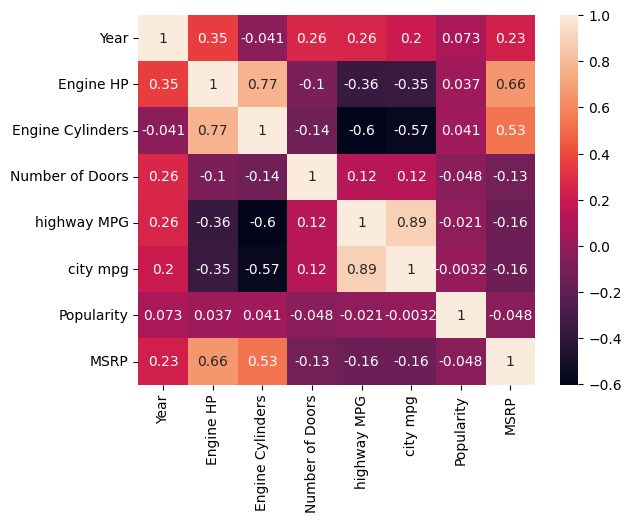

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [14]:
df.drop(columns=["Market Category","Popularity","Model"], inplace=True)


#### Multicollinearity Fix: Create avg_mpg

In [15]:

df['avg_mpg'] = (df['city mpg'] + df['highway MPG']) / 2
df.drop(columns=["city mpg","highway MPG"],inplace=True)


# city mpg & highway MPG correlation = 0.89
# Created avg_mpg to remove multicollinearity


In [16]:
### handling duplicate rows

In [17]:
print(df.duplicated().sum())

729


In [19]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,MSRP,avg_mpg
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,46135,22.5
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,40650,23.5
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,36350,24.0
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,29450,23.0
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,34500,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,46120,19.5
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,56670,19.5
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,50620,19.5
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,50920,19.5


In [20]:
df[df.duplicated()].head(6)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,MSRP,avg_mpg
14,BMW,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,31500,23.5
18,Audi,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,2000,20.5
20,Audi,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,2000,20.5
24,Audi,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,2000,20.5
25,Audi,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,2000,20.5
88,Nissan,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,2000,31.0


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
print(df.duplicated().sum())

0


### Outlier Detection (Visual + IQR)

In [23]:
### Use boxplots to detect extreme values.

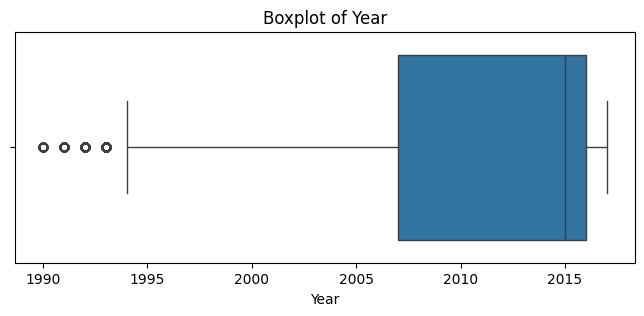

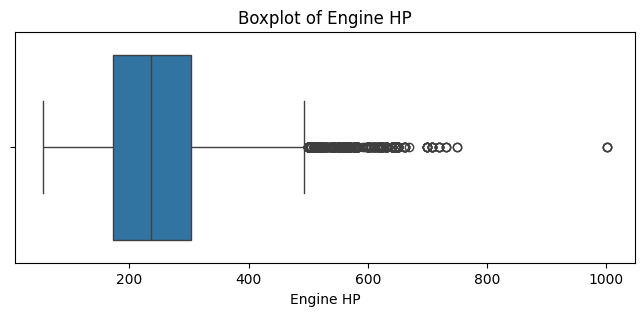

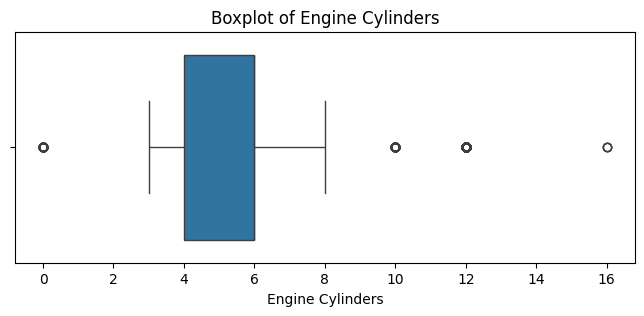

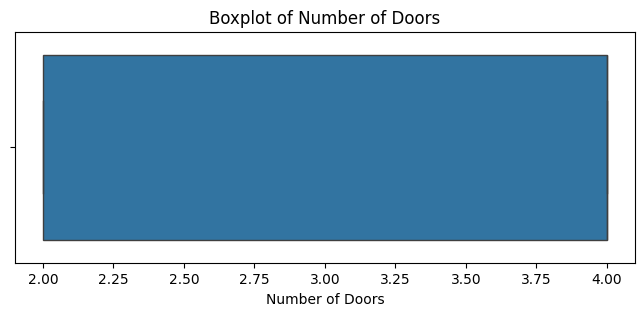

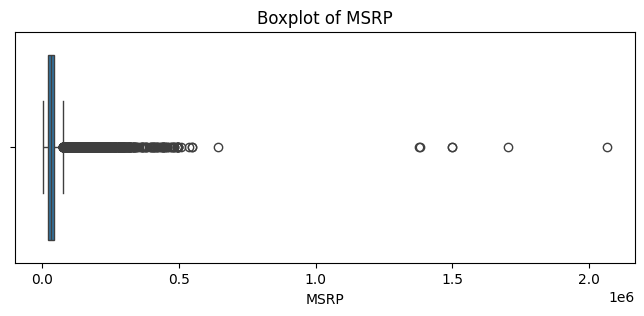

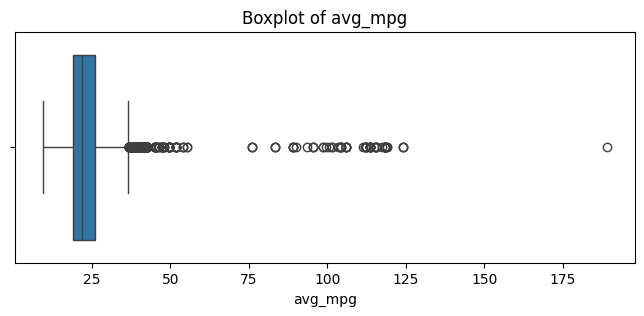

In [24]:
num=df.select_dtypes(include="number")
for c in num:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[c])
    plt.title(f'Boxplot of {c}')
    plt.show()

In [25]:
### IQR method

In [26]:
for i in df.columns:
    if df[i].dtype!="object":
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        low=Q1-1.5*IQR
        upp=Q3+1.5*IQR
        out=[]
        for x in df[i]:
            if x>upp or x<low :
                out.append(x)
        print()
        print(i)
        print("number of outliers :",len(out))
        print(out)

# Outliers exist in MSRP, Engine HP, Engine Cylinders

# Kept them because high-end cars naturally create extreme values

# Will use RobustScaler later


Year
number of outliers : 460
[1992, 1992, 1992, 1993, 1993, 1993, 1991, 1991, 1992, 1992, 1993, 1993, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1993, 1993, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1992, 1993, 1993, 1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1990, 1991, 1991, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1990, 1990, 1991, 1991, 1992, 1993, 1993, 1993, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1990, 1990, 1991, 1991, 1993, 1993, 1993, 1991, 1992, 1993, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1992, 1991, 1992, 1993, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1992, 1992, 1993, 1993, 1993, 1992, 1992, 1992, 1992, 19

### Univariate Analysis

In [27]:
# sns.barplot(x="Make",y="MSRP",data=df)

In [28]:
top10_make_avg = df.groupby("Make")["MSRP"].mean().sort_values(ascending=False).head(10)
top10_make_avg

Make
Bugatti         1.757224e+06
Maybach         5.462219e+05
Rolls-Royce     3.511306e+05
Lamborghini     3.315673e+05
Bentley         2.471693e+05
McLaren         2.398050e+05
Ferrari         2.382188e+05
Spyker          2.149900e+05
Aston Martin    1.981235e+05
Maserati        1.136845e+05
Name: MSRP, dtype: float64

C:\Users\victus\AppData\Local\Temp\ipykernel_13580\4010493924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_make_avg.index, y=top10_make_avg.values, palette="viridis")


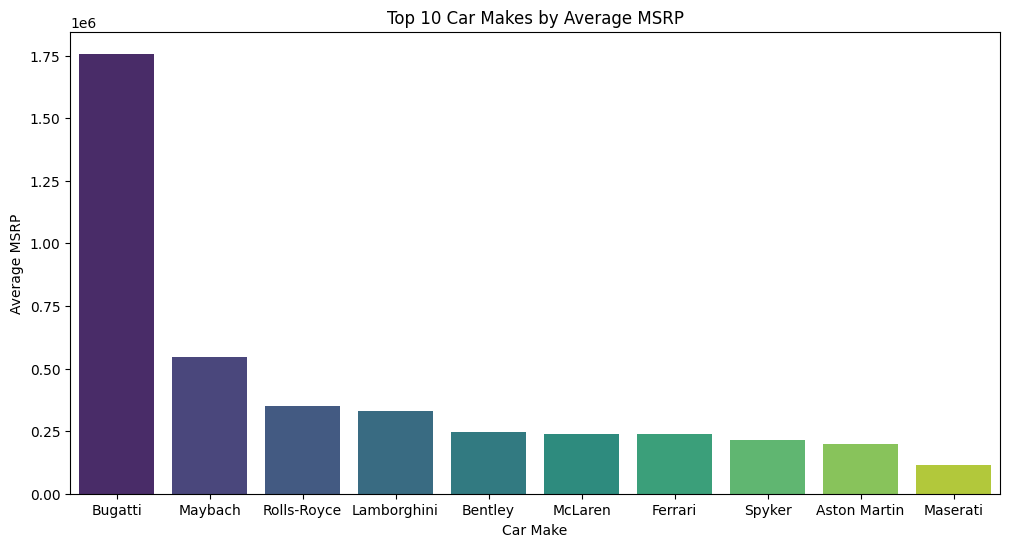

In [29]:
## Top 10 Most Expensive Brands (Avg MSRP)
# his requires grouping by brand and calculating mean price, not frequency.

plt.figure(figsize=(12,6))
sns.barplot(x=top10_make_avg.index, y=top10_make_avg.values, palette="viridis")
plt.title("Top 10 Car Makes by Average MSRP")
plt.xlabel("Car Make")
plt.ylabel("Average MSRP")


plt.show()

# Bugatti stands out as a clear outlier with average prices exceeding $1.7M, reflecting its ultra-exclusive hypercars.

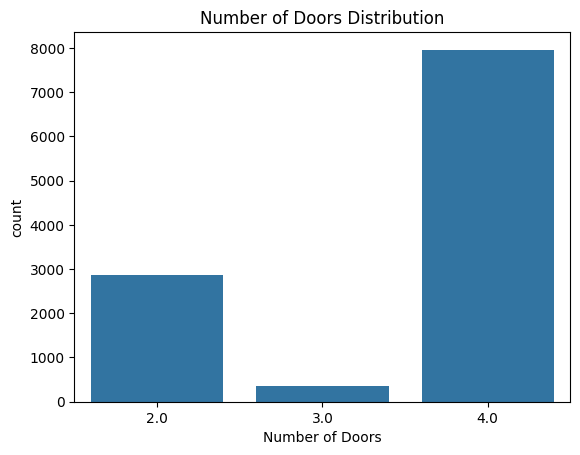

In [30]:
## Countplot: Number of Doors

sns.countplot(x="Number of Doors", data=df)
plt.title("Number of Doors Distribution")
plt.show()


In [31]:
# Most cars have 2 or 4 doors

C:\Users\victus\AppData\Local\Temp\ipykernel_13580\2066259029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number of Doors",y="MSRP",data=df,palette="Blues")


<Axes: xlabel='Number of Doors', ylabel='MSRP'>

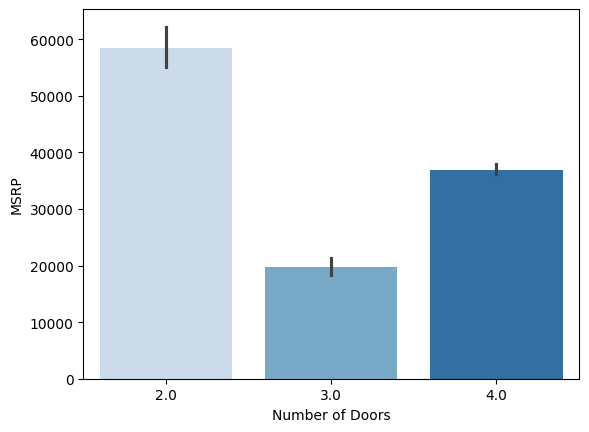

In [32]:
sns.barplot(x="Number of Doors",y="MSRP",data=df,palette="Blues")

### Bivariate Relationships

C:\Users\victus\AppData\Local\Temp\ipykernel_13580\3986016583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Engine Cylinders", y="MSRP", data=df, palette="viridis")


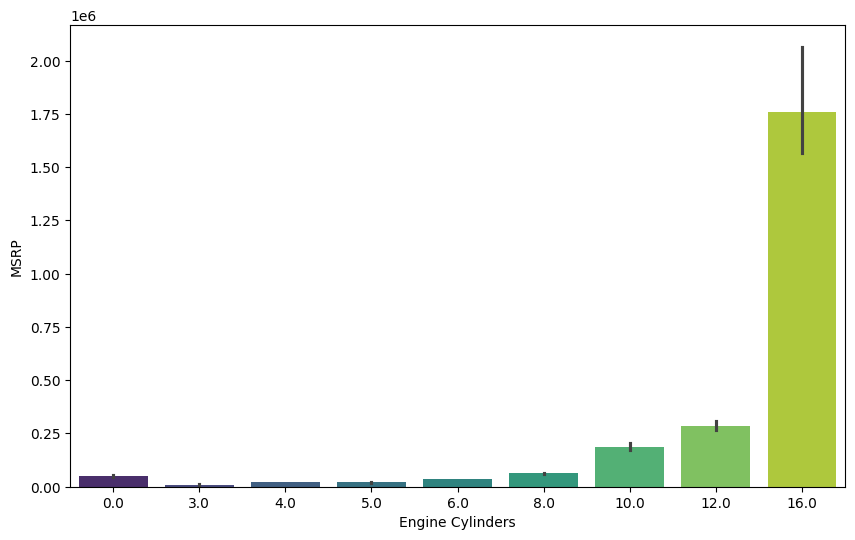

In [33]:
# Engine Cylinders vs MSRP

plt.figure(figsize=(10,6))
sns.barplot(x="Engine Cylinders", y="MSRP", data=df, palette="viridis")
plt.show()


C:\Users\victus\AppData\Local\Temp\ipykernel_13580\277188830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Style', y='MSRP', data=df, palette="magma")


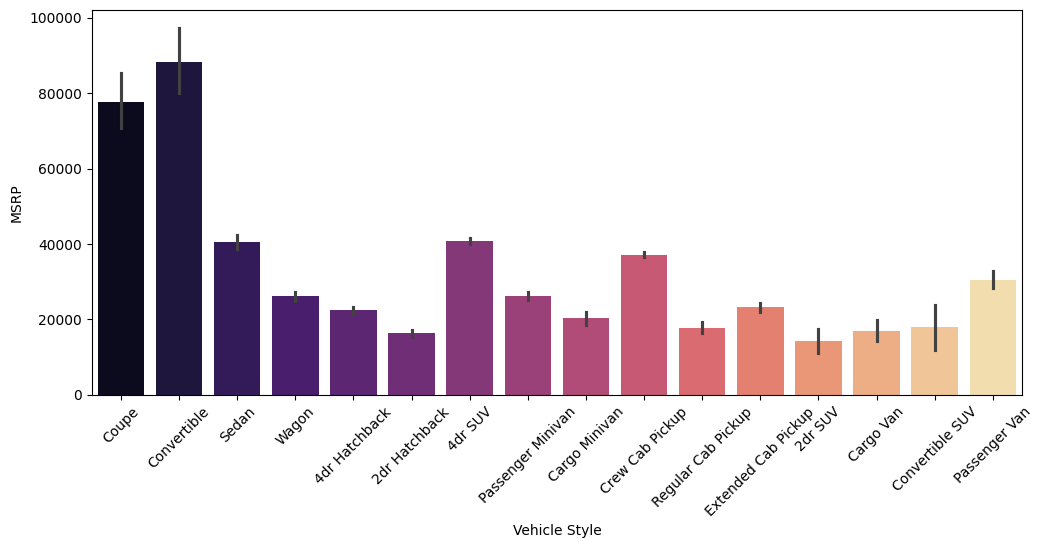

In [34]:
# Vehicle Style vs MSRP

plt.figure(figsize=(12,5))
sns.barplot(x='Vehicle Style', y='MSRP', data=df, palette="magma")
plt.xticks(rotation=45)
plt.show()


C:\Users\victus\AppData\Local\Temp\ipykernel_13580\4165194940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission Type', y='MSRP', data=df, palette="viridis")


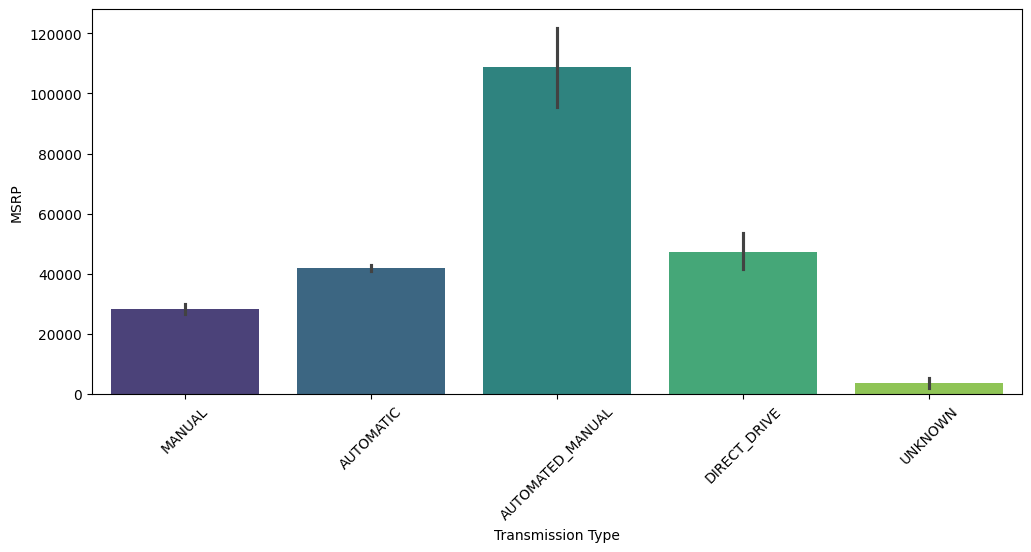

In [35]:
# Transmission Type vs MSRP

plt.figure(figsize=(12,5))
sns.barplot(x='Transmission Type', y='MSRP', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.show()
# It helps us understand how transmission choice impacts car price.

# This chart shows that transmission type has a significant impact on car pricing.
# Premium and performance-focused transmissions such as AUTOMATED_MANUAL have the highest average MSRP, indicating their presence in luxury and high-performance vehicles.


C:\Users\victus\AppData\Local\Temp\ipykernel_13580\165135014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Driven_Wheels', y='MSRP', data=df, palette="Set2")


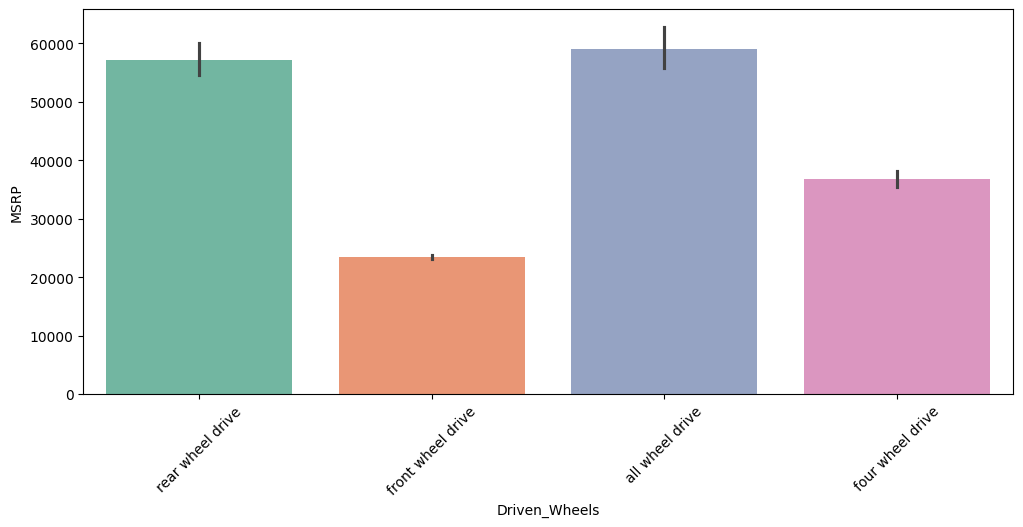

In [36]:
# Transmission Type vs MSRP

plt.figure(figsize=(12,5))
sns.barplot(x='Driven_Wheels', y='MSRP', data=df, palette="Set2")
plt.xticks(rotation=45)
plt.show()
# It helps us understand how drive type influences car price
# This plot shows that drivetrain configuration has a clear impact on vehicle pricing.
# Rear-wheel drive and all-wheel drive vehicles are the most expensive because they are commonly used in performance-oriented or luxury models.

C:\Users\victus\AppData\Local\Temp\ipykernel_13580\178642631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engine Fuel Type', y='MSRP', data=df, palette="rocket")


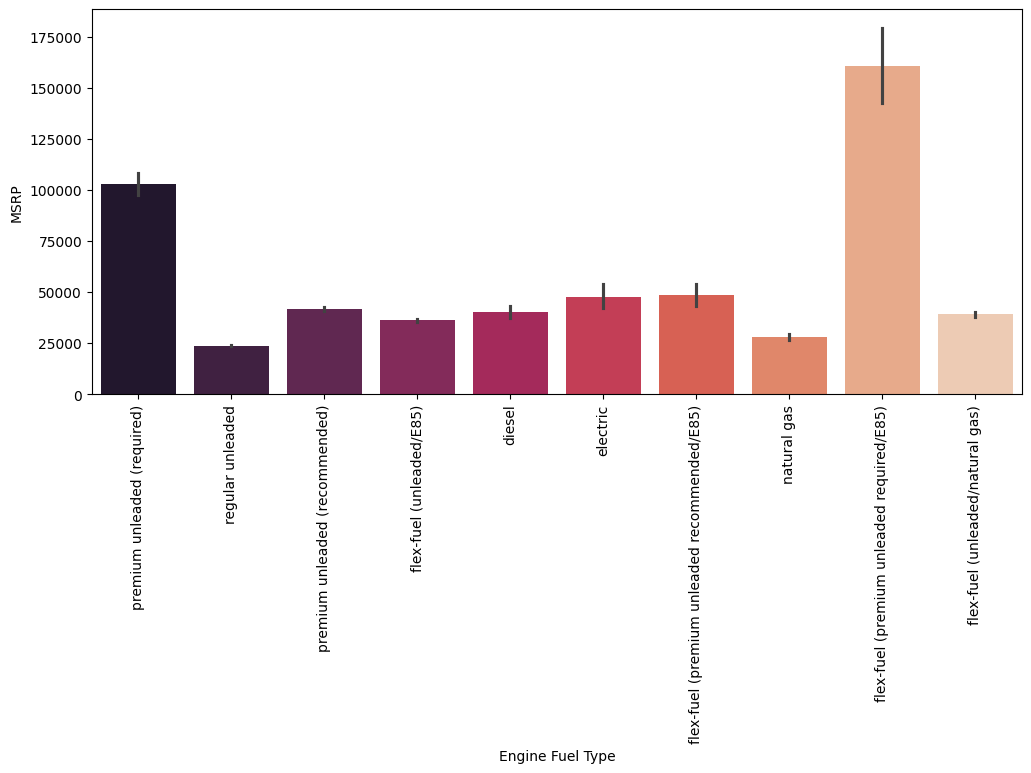

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='Engine Fuel Type', y='MSRP', data=df, palette="rocket")
plt.xticks(rotation=90)
plt.show()


# This barplot displays the average MSRP for each Engine Fuel Type
# This barplot shows that fuel type has a clear relationship with car price.
# Cars requiring premium or flex-fuel premium are significantly more expensive because they usually contain high-performance, luxury, or large engines

C:\Users\victus\AppData\Local\Temp\ipykernel_13580\2809630072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Size', y='MSRP', data=df, palette="viridis")


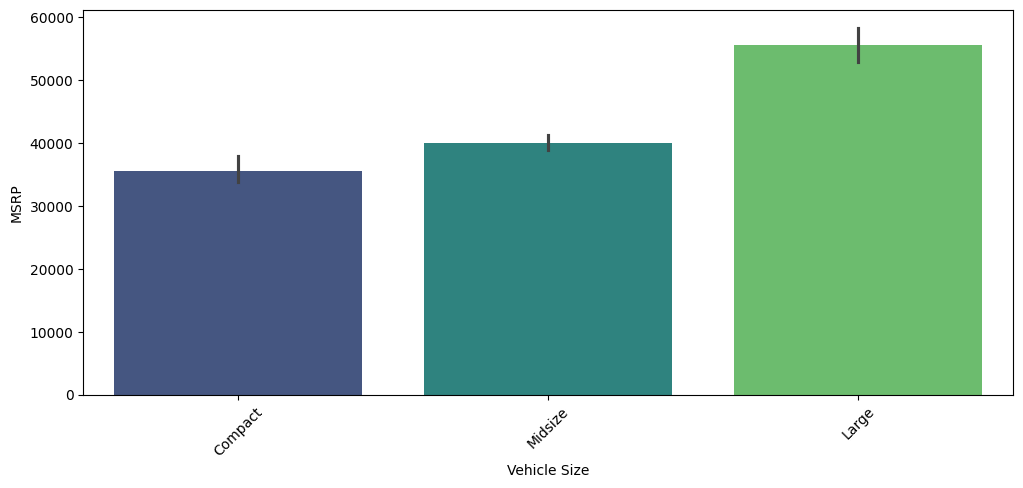

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x='Vehicle Size', y='MSRP', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.show()

In [39]:
df.columns

Index(['Make', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'MSRP', 'avg_mpg'],
      dtype='object')

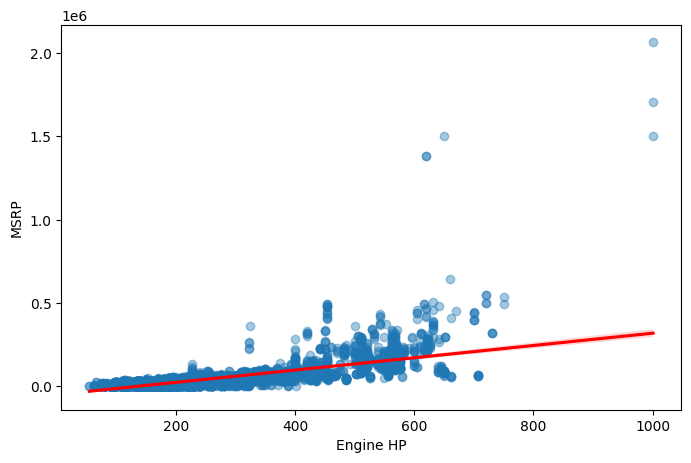

In [40]:
# Regplot: Engine HP vs MSRP

plt.figure(figsize=(8,5))
sns.regplot(x="Engine HP", y="MSRP", data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.show()

### Strong positive trend for HP → MSRP

## “Regplot not only shows individual data points but also fits a regression line.
#This helps visually understand the direction and strength of the relationship between two numeric variables.”


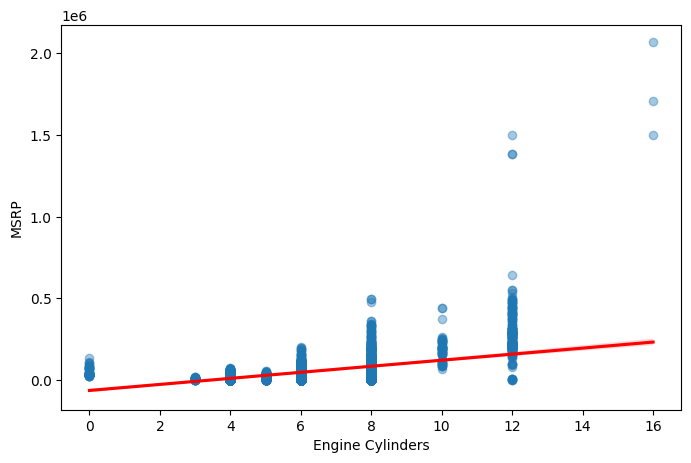

In [41]:
plt.figure(figsize=(8,5))
sns.regplot(x="Engine Cylinders", y="MSRP", data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.show()
## It explains how the number of engine cylinders affects the price of a car.
## There is a positive trend between engine cylinders and MSRP
#  Cars with more cylinders generally cost more because they provide higher performance.

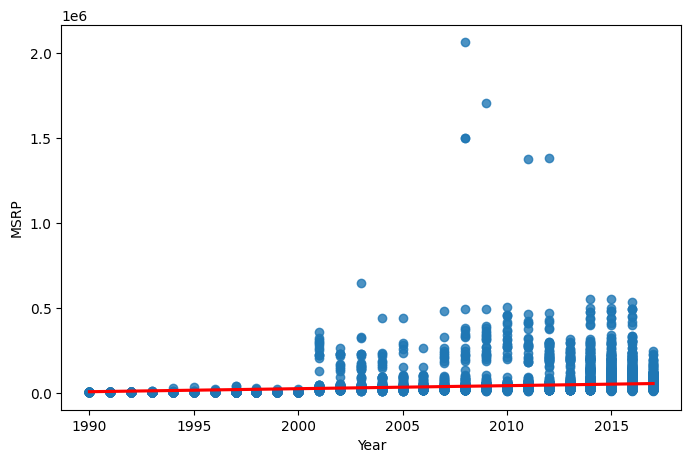

In [42]:
plt.figure(figsize=(8,5))
sns.regplot(x="Year", y="MSRP", data=df,  line_kws={'color':'red'})
plt.show()


# It shows the relationship between car manufacturing year and car price.

## Recent cars (Year) tend to be expensive 

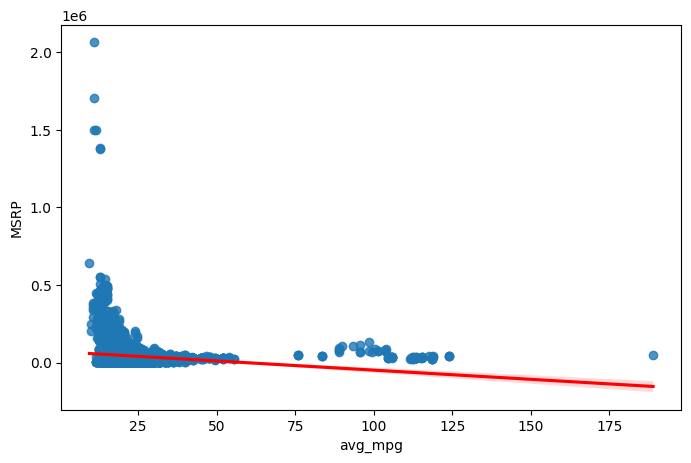

In [43]:
plt.figure(figsize=(8,5))
sns.regplot(x="avg_mpg", y="MSRP", data=df,  line_kws={'color':'red'})


plt.show()

#It shows the relationship between fuel efficiency and car price.

# Fuel efficiency (avg_mpg) shows negative relation


In [44]:
### ✔ There is a negative relationship
#As avg_mpg increases, MSRP drops sharply.         #Per Gallon

### Encode Categorical Features

In [45]:
obj=df.select_dtypes(include="object").columns
for i in obj:
    print(i,":",df[i].nunique())
    print()


Make : 48

Engine Fuel Type : 10

Transmission Type : 5

Driven_Wheels : 4

Vehicle Size : 3

Vehicle Style : 16



In [46]:
# One-hot encoding for low/medium cardinality

df = pd.get_dummies(df,
                    columns=['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Style'],
                    drop_first=True,dtype="int")



In [47]:
df["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [48]:
# label encoding for ordinal small 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Vehicle Size"]=le.fit_transform(df["Vehicle Size"])

In [49]:
## Make -- Target Encoding 
# Target encoding for Make (high-cardinality and meaningful)


from category_encoders import TargetEncoder
te = TargetEncoder()

df["Make"]=te.fit_transform(df["Make"],df["MSRP"])



In [50]:
df.head()

,Make,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,MSRP,avg_mpg,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,62162.558642,2011,335.0,6.0,2.0,0,46135,22.5,0,0,...,0,0,1,0,0,0,0,0,0,0
1,62162.558642,2011,300.0,6.0,2.0,0,40650,23.5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,62162.558642,2011,300.0,6.0,2.0,0,36350,24.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,62162.558642,2011,230.0,6.0,2.0,0,29450,23.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,62162.558642,2011,230.0,6.0,2.0,0,34500,23.0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Scaling

In [51]:
## Robust Scaling is used because it is not affected by outliers.

from sklearn.preprocessing import RobustScaler

num_cols = ['Engine HP', 'Engine Cylinders', 'avg_mpg', 'MSRP']
scaler = RobustScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

# RobustScaler handles outliers effectively

# Required for most ML models



#### Year is NOT a real numeric feature 
Year looks like a number (1990, 2005, 2015),
but it is actually a timestamp, not a continuous measurement like HP or MPG.

Scaling a timestamp does NOT make any meaningful sense.


### FINAL CLEAN DATASET

In [52]:
df.reset_index(drop=True, inplace=True)




In [53]:
df

,Make,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,MSRP,avg_mpg,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,62162.558642,2011,0.755725,0.0,2.0,0,0.720149,0.071429,0,0,...,0,0,1,0,0,0,0,0,0,0
1,62162.558642,2011,0.488550,0.0,2.0,0,0.464319,0.214286,0,0,...,1,0,0,0,0,0,0,0,0,0
2,62162.558642,2011,0.488550,0.0,2.0,0,0.263759,0.285714,0,0,...,0,0,1,0,0,0,0,0,0,0
3,62162.558642,2011,-0.045802,0.0,2.0,0,-0.058069,0.142857,0,0,...,0,0,1,0,0,0,0,0,0,0
4,62162.558642,2011,-0.045802,0.0,2.0,0,0.177472,0.142857,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,35087.487806,2012,0.488550,0.0,4.0,2,0.719450,-0.357143,0,0,...,0,0,0,0,0,0,0,0,0,0
11181,35087.487806,2012,0.488550,0.0,4.0,2,1.211521,-0.357143,0,0,...,0,0,0,0,0,0,0,0,0,0
11182,35087.487806,2012,0.488550,0.0,4.0,2,0.929338,-0.357143,0,0,...,0,0,0,0,0,0,0,0,0,0
11183,35087.487806,2013,0.488550,0.0,4.0,2,0.943330,-0.357143,0,0,...,0,0,0,0,0,0,0,0,0,0


🟧 Key Insights from the Analysis

1️⃣ Engine Specifications Strongly Influence Price

Engine HP and Engine Cylinders are the strongest predictors of MSRP.

Higher horsepower consistently corresponds to higher price.

2️⃣ Vehicle Style and Size Matter

Luxury and performance styles (e.g., Convertible, Coupe, SUV) show significantly higher MSRP ranges.

Larger vehicle sizes are also priced higher.

3️⃣ Make (Brand) Is a Major Determinant

Premium brands like BMW, Mercedes-Benz, Audi, Lexus have much higher price ranges.

Target encoding captured brand-wise price patterns effectively.

4️⃣ Fuel Efficiency Has a Negative Relationship with Price

Higher avg_mpg (better mileage) → lower MSRP.

High-performance cars sacrifice mileage for power.



## ML

In [58]:
x=df[['Engine Cylinders']]
y=df['MSRP']